## Import relevant libraries and load dataset

In [1]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_auc_score,auc,roc_curve
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.express as px
from seaborn_qqplot import pplot 
from IPython.display import Image

In [2]:
# load preprocessed_train.csv into pandas dataframe
train_df = pd.read_csv("preprocessed_train.csv")
# print the first 5 rows
train_df.head()

id  target      0      1      2      3      4      5      6      7  ...  \
0   0     1.0 -0.098  2.165  0.681 -0.614  1.309 -0.455 -0.236  0.276  ...   
1   1     0.0  1.081 -0.973 -0.383  0.326 -0.428  0.317  1.172  0.352  ...   
2   2     1.0 -0.523 -0.089 -0.348  0.148 -0.022  0.404 -0.023 -0.172  ...   
3   3     1.0  0.067 -0.021  0.392 -1.637 -0.446 -0.725 -1.035  0.834  ...   
4   4     1.0  2.347 -0.831  0.511 -0.021  1.225  1.594  0.585  1.509  ...   

   inversetangent  hyperbolicsine  hyperboliccosine  hyperbolictangent  \
0       -0.010571       -0.004502          1.765149          -0.010765   
1        0.067941        0.089790          1.622502           0.065681   
2        0.006444        0.086690          1.662417           0.002687   
3        0.057935        0.180076          1.572025           0.053542   
4        0.076936        0.277209          1.584532           0.068240   

   exponential  exponentialm1  exponential2  poweroftwo  powerofthree  \
0     1.760647       0.760647      1.315869    1.182425      0.015243   
1     1.712292       0.712292      1.324817    0.976056      0.047272   
2     1.749107       0.749107      1.313960    1.023024      0.266454   
3     1.752101       0.752101      1.326229    0.887980      0.371308   
4     1.861741       0.861741      1.377569    0.901115      0.613952   

   poweroffour  
0     3.584848  
1     2.766570  
2     3.092631  
3     2.553467  
4     2.671541  

[5 rows x 322 columns]

In [3]:
# load preprocessed_test.csv into pandas dataframe
test_df = pd.read_csv("preprocessed_test.csv")
# print the first 5 rows
test_df.head()

id      0      1      2      3      4      5      6      7      8  ...  \
0  250  0.500 -1.033 -1.595  0.309 -0.714  0.502  0.535 -0.129 -0.687  ...   
1  251  0.776  0.914 -0.494  1.347 -0.867  0.480  0.578 -0.313  0.203  ...   
2  252  1.750  0.509 -0.057  0.835 -0.476  1.428 -0.701 -2.009 -1.378  ...   
3  253 -0.556 -1.855 -0.682  0.578  1.592  0.512 -1.419  0.722  0.511  ...   
4  254  0.754 -0.245  1.173 -1.623  0.009  0.370  0.781 -1.763 -1.432  ...   

   inversetangent  hyperbolicsine  hyperboliccosine  hyperbolictangent  \
0        0.103791        0.264990          1.639407           0.097112   
1       -0.021779       -0.065305          1.707521          -0.020326   
2       -0.025656       -0.131476          1.649251          -0.022351   
3        0.001523       -0.022843          1.589608           0.003396   
4        0.071672        0.195819          1.653205           0.064720   

   exponential  exponentialm1  exponential2  poweroftwo  powerofthree  \
0     1.904397       0.904397      1.404195    0.985912      0.477020   
1     1.642217       0.642217      1.265487    1.094274     -0.128315   
2     1.517775       0.517775      1.214393    0.994294     -0.330590   
3     1.566765       0.566765      1.243412    0.956136     -0.076546   
4     1.849024       0.849024      1.374870    0.988710      0.371320   

   poweroffour  
0     2.913247  
1     3.281111  
2     3.062801  
3     2.382968  
4     3.079160  

[5 rows x 321 columns]

In [4]:
# how many datapoints and features present in train and test dataset
print("Training Dataset:",train_df.shape)
print("Test Dataset    :",test_df.shape)

Training Dataset: (250, 322)
Test Dataset    : (19750, 321)


In [5]:
y = train_df["target"].values # store values of feature "target"
X = train_df.drop(["id","target"],axis=1) # drop id and class label from the dataset
print("Size of class label :",len(y))
print("Class Label         :")
print(y)
print()
print("Number of data points belonging to each class label: ")
print(train_df["target"].value_counts())
print()
print("Number of rows and columns in train dataset:",X.shape)
print("Train Dataset in tabular format            :")
X.head(2)

Size of class label : 250
Class Label         :
[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]

Number of data points belonging to each class label: 
1.0    160
0.0     90
Name: target, dtype: int64

Number of rows and columns in train dataset: (250, 320)
Train Dataset in tabular form

0      1      2      3      4      5      6      7      8      9  ...  \
0 -0.098  2.165  0.681 -0.614  1.309 -0.455 -0.236  0.276 -2.246  1.825  ...   
1  1.081 -0.973 -0.383  0.326 -0.428  0.317  1.172  0.352  0.004 -0.291  ...   

   inversetangent  hyperbolicsine  hyperboliccosine  hyperbolictangent  \
0       -0.010571       -0.004502          1.765149          -0.010765   
1        0.067941        0.089790          1.622502           0.065681   

   exponential  exponentialm1  exponential2  poweroftwo  powerofthree  \
0     1.760647       0.760647      1.315869    1.182425      0.015243   
1     1.712292       0.712292      1.324817    0.976056      0.047272   

   poweroffour  
0     3.584848  
1     2.766570  

[2 rows x 320 columns]

## Data Scaling

In [6]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize train features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
# print the first 5 rows
X.head()

0         1         2         3         4         5         6    \
0 -0.121736  2.176002  0.503692 -0.609972  1.265232 -0.469388 -0.266814   
1  1.061577 -0.939278 -0.539790  0.320974 -0.415729  0.340017  1.134681   
2 -0.548290 -0.061678 -0.505465  0.144689 -0.022827  0.431232 -0.054798   
3  0.043868  0.005829  0.220265 -1.623118 -0.433148 -0.752470 -1.062122   
4  2.332208 -0.798306  0.336970 -0.022683  1.183942  1.678890  0.550393   

        7         8         9    ...       310       311       312       313  \
0  0.210682 -2.296917  1.758518  ... -0.244802 -0.025449  1.662065 -0.267116   
1  0.291718  0.042547 -0.320787  ...  1.649698  0.822779 -0.404664  1.702451   
2 -0.267006  0.180835  0.144993  ...  0.165774  0.794897  0.173637  0.079461   
3  0.805660  0.561388  0.234415  ...  1.408268  1.634976 -1.136002  1.389716   
4  1.525391  0.025911  2.125050  ...  1.866754  2.508765 -0.954792  1.768380   

        314       315       316       317       318       319  
0  0.881744  0.881744  0.740246  2.215470  0.079806  1.055914  
1  0.500674  0.500674  0.890818 -0.354507  0.214521 -0.419912  
2  0.790801  0.790801  0.708132  0.230399  1.136412  0.168163  
3  0.814392  0.814392  0.914581 -1.451333  1.577432 -0.804260  
4  1.678423  1.678423  1.778434 -1.287762  2.598002 -0.591304  

[5 rows x 320 columns]

In [7]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize test features by removing the mean and scaling to unit variance.
test = test_df.drop("id",axis=1) 
test = scaler.transform(test)
test = pd.DataFrame(test)
# print the first 5 rows
test.head()

0         1         2         3         4         5         6    \
0  0.478452 -0.998843 -1.728417  0.304138 -0.692502  0.533981  0.500624   
1  0.755461  0.934060 -0.648649  1.332140 -0.840565  0.510915  0.543426   
2  1.733024  0.531992 -0.220077  0.825072 -0.462180  1.504847 -0.729665   
3 -0.581411 -1.814892 -0.833024  0.570547  1.539102  0.544465 -1.444348   
4  0.733381 -0.216549  0.986204 -1.609253  0.007173  0.395585  0.745488   

        7         8         9    ...       310       311       312       313  \
0 -0.221157 -0.675928  1.233779  ...  2.514771  2.398846 -0.159734  2.512255   
1 -0.417350  0.249460  1.297652  ... -0.515238 -0.572419  0.827132 -0.513452   
2 -2.225742 -1.394404  0.129271  ... -0.608789 -1.167685 -0.017111 -0.565623   
3  0.686238  0.569706  0.522334  ...  0.047048 -0.190439 -0.881250  0.097728   
4 -1.963439 -1.450551 -0.948706  ...  1.739726  1.776601  0.040165  1.677692   

        314       315       316       317       318       319  
0  2.014582  2.014582  2.226446 -0.231760  2.022061 -0.155368  
1 -0.051560 -0.051560 -0.107488  1.117693 -0.524004  0.508102  
2 -1.032236 -1.032236 -0.967202 -0.127379 -1.374781  0.114362  
3 -0.646164 -0.646164 -0.478917 -0.602568 -0.306260 -1.111767  
4  1.578206  1.578206  1.733010 -0.196915  1.577482  0.143868  

[5 rows x 320 columns]

## Use best model to make predictions

In [8]:
# use the best model to make predictions
# Load the best model
filename = "bestmodel.sav"
modellist = pickle.load(open(filename, 'rb'))
clf = modellist[1]
ypred = clf.predict(X) 
print("Predicted Output:")
print(ypred)

Predicted Output:
[0.73843056 0.34383119 0.77908922 0.61154483 0.62949347 0.88684489
 0.6034339  0.64803845 0.70015005 0.68034801 0.44714816 0.62063654
 0.75891289 0.33757281 0.53610858 0.97573692 0.82448883 0.59854439
 0.7710654  0.83634917 0.73389653 0.63025154 0.33271865 0.30604968
 0.56998768 0.60889542 0.70004522 0.84838431 0.83383818 0.68176118
 0.710159   0.71174277 0.56434804 0.53974474 0.76053252 0.62401935
 0.67110097 0.77664201 0.44989295 0.50404727 0.80549928 0.62415869
 0.67414868 0.58376994 0.80486823 0.65998562 0.87957076 0.75721276
 0.38487893 0.42995652 0.33278542 0.84962118 0.43828582 0.55542616
 0.71755231 0.76375207 0.56427999 0.75703472 0.46186926 0.51610024
 0.46608293 0.53504222 0.66150736 0.34249829 0.59227591 0.71176167
 0.61939513 0.75890317 0.73860031 0.84603059 0.555374   1.15463533
 1.02965459 0.80060243 0.57661969 0.55330787 0.92963374 0.68668858
 0.48345731 0.85917427 0.6279425  0.49571531 0.63213184 0.69120306
 0.6428661  0.73273402 0.53623044 0.60313225

In [9]:
def predict(ypred):
    """
    If the predicted value is >=0.5, replace it with 1.0 otherwise replace it with 0.0
    Input: Predicted Class Label with probabilities
    Output: Predicted Class Label with 1.0 and 0.0
    """
    pred = list()
    for index in range(len(ypred)):
        if ypred[index]>=0.5:
            pred.append(1.0)
        else:
            pred.append(0.0)
    return np.array(pred)

pred = predict(ypred)
pred

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## Plot ROC Curve

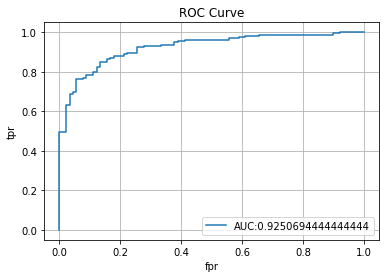

In [10]:
# Plot ROC Curve for the predicted class label
fpr,tpr,thresholds = roc_curve(y,ypred)
plt.plot(fpr,tpr,label="AUC:"+str(auc(fpr,tpr)))
plt.title("ROC Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.grid()
plt.legend()
plt.show()

Observations:<br>
We are getting a good AUC ROC Score of 0.92 on the final dataset.

## Create a dataframe consists of preprocessed data, actual and predicted target

In [11]:
# creating a dataframe 'data'
data = pd.DataFrame({'Actual':y,'Predicted':pred})
# concat 'X' and 'data'
df = pd.concat([X,data],axis=1)
# print the first 5 rows
df.head()

0         1         2         3         4         5         6  \
0 -0.121736  2.176002  0.503692 -0.609972  1.265232 -0.469388 -0.266814   
1  1.061577 -0.939278 -0.539790  0.320974 -0.415729  0.340017  1.134681   
2 -0.548290 -0.061678 -0.505465  0.144689 -0.022827  0.431232 -0.054798   
3  0.043868  0.005829  0.220265 -1.623118 -0.433148 -0.752470 -1.062122   
4  2.332208 -0.798306  0.336970 -0.022683  1.183942  1.678890  0.550393   

          7         8         9  ...       312       313       314       315  \
0  0.210682 -2.296917  1.758518  ...  1.662065 -0.267116  0.881744  0.881744   
1  0.291718  0.042547 -0.320787  ... -0.404664  1.702451  0.500674  0.500674   
2 -0.267006  0.180835  0.144993  ...  0.173637  0.079461  0.790801  0.790801   
3  0.805660  0.561388  0.234415  ... -1.136002  1.389716  0.814392  0.814392   
4  1.525391  0.025911  2.125050  ... -0.954792  1.768380  1.678423  1.678423   

        316       317       318       319  Actual  Predicted  
0  0.740246  2.215470  0.079806  1.055914     1.0        1.0  
1  0.890818 -0.354507  0.214521 -0.419912     0.0        0.0  
2  0.708132  0.230399  1.136412  0.168163     1.0        1.0  
3  0.914581 -1.451333  1.577432 -0.804260     1.0        1.0  
4  1.778434 -1.287762  2.598002 -0.591304     1.0        1.0  

[5 rows x 322 columns]

In [12]:
# how many correct and incorrect predictions
(df["Actual"]==df["Predicted"]).value_counts()

True     206
False     44
dtype: int64

Observations:
<ol>
    1. Our best model has correctly predicted 206 target values out of 250 target values. <br>
    2. Our best model has incorrectly predicted 44 target values out of 250 target values.
</ol>

## Create two dataframes from the given dataframe

In [13]:
# check for each row if Predicted class label is same as Actual class label
m = df['Actual'] == df['Predicted']
# create dataframe containing correct predictions
correct_df = df.loc[m]
# create dataframe containing correct predictions
incorrect_df = df.loc[~m]

## Plotting for Exploratory Data Analysis (EDA)

### Number datapoints and features in the datasets

In [14]:
# CORRECT PREDICTIONS DATASET
# Reset index
correct_df.reset_index(inplace=True,drop=True)
print("number of datapoints and features in correct predictions dataset:",correct_df.shape)
# print the first 5 rows
correct_df.head()

number of datapoints and features in correct predictions dataset: (206, 322)


0         1         2         3         4         5         6  \
0 -0.121736  2.176002  0.503692 -0.609972  1.265232 -0.469388 -0.266814   
1  1.061577 -0.939278 -0.539790  0.320974 -0.415729  0.340017  1.134681   
2 -0.548290 -0.061678 -0.505465  0.144689 -0.022827  0.431232 -0.054798   
3  0.043868  0.005829  0.220265 -1.623118 -0.433148 -0.752470 -1.062122   
4  2.332208 -0.798306  0.336970 -0.022683  1.183942  1.678890  0.550393   

          7         8         9  ...       312       313       314       315  \
0  0.210682 -2.296917  1.758518  ...  1.662065 -0.267116  0.881744  0.881744   
1  0.291718  0.042547 -0.320787  ... -0.404664  1.702451  0.500674  0.500674   
2 -0.267006  0.180835  0.144993  ...  0.173637  0.079461  0.790801  0.790801   
3  0.805660  0.561388  0.234415  ... -1.136002  1.389716  0.814392  0.814392   
4  1.525391  0.025911  2.125050  ... -0.954792  1.768380  1.678423  1.678423   

        316       317       318       319  Actual  Predicted  
0  0.740246  2.215470  0.079806  1.055914     1.0        1.0  
1  0.890818 -0.354507  0.214521 -0.419912     0.0        0.0  
2  0.708132  0.230399  1.136412  0.168163     1.0        1.0  
3  0.914581 -1.451333  1.577432 -0.804260     1.0        1.0  
4  1.778434 -1.287762  2.598002 -0.591304     1.0        1.0  

[5 rows x 322 columns]

In [15]:
# INCORRECT PREDICTIONS DATASET
# reset index
incorrect_df.reset_index(inplace=True,drop=True)
print("number of datapoints and features in incorrect predictions dataset:",incorrect_df.shape)
# print the first 5 rows
incorrect_df.head()

number of datapoints and features in incorrect predictions dataset: (44, 322)


0         1         2         3         4         5         6  \
0 -0.650663  0.651123  2.068914  0.892417  1.299103  0.526642 -0.335495   
1 -1.203679 -0.329723  0.901862 -0.736739 -1.381531 -0.990468 -0.697813   
2  0.613946 -0.437934  1.143118 -0.132614 -0.126375 -1.010389 -0.881958   
3  2.123447  0.107091 -1.181178 -0.706037 -0.047988 -0.104526  0.612107   
4 -0.841358 -1.792058 -0.324032 -0.721883  0.049753 -0.840540  0.565324   

          7         8         9  ...       312       313       314       315  \
0 -0.757490 -0.028157 -0.430845  ... -0.855485  0.579692 -0.036285 -0.036285   
1  0.876033  1.153013  1.048056  ...  0.033894  0.694498  0.752153  0.752153   
2  0.499641  0.762062  0.151872  ... -0.651939  0.063261 -0.851262 -0.851262   
3  0.761943  0.790136  1.137478  ...  0.107428  0.152517  0.158208  0.158208   
4 -0.185970  0.195392 -0.600845  ...  0.165277 -0.529924 -0.627460 -0.627460   

        316       317       318       319  Actual  Predicted  
0  0.136762 -0.826751  0.409013 -0.806674     0.0        1.0  
1  0.794525  0.102401  0.794149 -0.049362     0.0        1.0  
2 -0.652347 -0.699203 -0.871008 -0.507493     1.0        0.0  
3  0.104335  0.137212 -0.000211  0.033214     0.0        1.0  
4 -0.671584  0.384977 -0.883677 -0.006999     1.0        0.0  

[5 rows x 322 columns]

Observations:
<ol>
    1. The correct predictions dataset consists of 206 datapoints and 322 features. <br>
    2. The incorrect predictions dataset consists of 44 datapoints and 322 features.
</ol>

### Concise summary of dataframes

In [16]:
# CORRECT PREDICTIONS DATASET
# description of the correct predictions dataset in the dataframe
correct_df.describe()

0           1           2           3           4           5  \
count  206.000000  206.000000  206.000000  206.000000  206.000000  206.000000   
mean     0.032301    0.026277   -0.012712   -0.016607   -0.072501   -0.021846   
std      0.935774    0.989124    1.020391    1.007891    1.016590    1.000998   
min     -2.350860   -2.883101   -2.593409   -2.338164   -2.484752   -2.975188   
25%     -0.565603   -0.608689   -0.633203   -0.705790   -0.778146   -0.628752   
50%      0.005729    0.117019    0.016276   -0.025159   -0.066859    0.035966   
75%      0.622728    0.652612    0.625300    0.711179    0.665718    0.694918   
max      2.332208    2.193872    3.162412    2.575052    2.372324    2.448454   

                6           7           8           9  ...         312  \
count  206.000000  206.000000  206.000000  206.000000  ...  206.000000   
mean    -0.037736    0.036844   -0.022271   -0.001151  ...    0.005911   
std      1.034706    0.952834    1.024426    1.005467  ...    0.990852   
min     -2.994155   -2.700231   -2.839673   -2.248763  ...   -2.176501   
25%     -0.763757   -0.611145   -0.703222   -0.679212  ...   -0.713836   
50%     -0.061268    0.121648   -0.018799   -0.014689  ...   -0.073998   
75%      0.741009    0.711828    0.671863    0.677594  ...    0.613381   
max      2.139020    2.950992    2.650270    2.872853  ...    3.394314   

              313         314         315         316         317         318  \
count  206.000000  206.000000  206.000000  206.000000  206.000000  206.000000   
mean    -0.061855   -0.020168   -0.020168   -0.031117    0.014431   -0.008002   
std      0.967764    1.007240    1.007240    0.995800    0.997137    1.018153   
min     -2.484221   -2.414608   -2.414608   -2.315156   -2.246281   -2.341743   
25%     -0.674037   -0.752923   -0.752923   -0.769063   -0.646674   -0.798003   
50%     -0.011244   -0.137942   -0.137942   -0.013631   -0.082551   -0.015864   
75%      0.567883    0.707480    0.707480    0.738707    0.597962    0.732191   
max      2.766745    3.283514    3.283514    2.904980    3.227392    2.762452   

              319      Actual   Predicted  
count  206.000000  206.000000  206.000000  
mean     0.000601    0.747573    0.747573  
std      0.987885    0.435463    0.435463  
min     -2.171396    0.000000    0.000000  
25%     -0.752899    0.250000    0.250000  
50%     -0.047349    1.000000    1.000000  
75%      0.616887    1.000000    1.000000  
max      3.823356    1.000000    1.000000  

[8 rows x 322 columns]

In [17]:
# INCORRECT PREDICTIONS DATASET
# description of the incorrect predictions dataset dataset in the dataframe
incorrect_df.describe()

0          1          2          3          4          5  \
count  44.000000  44.000000  44.000000  44.000000  44.000000  44.000000   
mean   -0.151230  -0.123026   0.059517   0.077749   0.339437   0.102281   
std     1.269187   1.063414   0.919624   0.981562   0.862518   1.011927   
min    -2.312721  -2.340062  -1.720572  -2.273790  -1.381531  -1.460175   
25%    -1.185613  -0.904531  -0.489283  -0.548569  -0.167988  -0.839753   
50%    -0.356090  -0.107842   0.095224   0.038224   0.113140   0.176983   
75%     0.939633   0.626553   0.607402   0.713408   0.741686   0.730041   
max     2.553013   2.428163   2.068914   2.742424   2.805871   2.935984   

               6          7          8          9  ...        312        313  \
count  44.000000  44.000000  44.000000  44.000000  ...  44.000000  44.000000   
mean    0.176673  -0.172496   0.104271   0.005389  ...  -0.027676   0.289593   
std     0.819202   1.203612   0.892895   0.997097  ...   1.064137   1.115699   
min    -1.190526  -3.755837  -2.336428  -2.354890  ...  -2.563615  -2.254827   
25%    -0.491769  -0.915831  -0.272241  -0.609688  ...  -0.646677  -0.474340   
50%     0.221420   0.057672   0.301448   0.117479  ...  -0.042306   0.087987   
75%     0.747727   0.772339   0.760503   0.695773  ...   0.513387   1.109485   
max     2.502333   1.645879   1.718643   1.844010  ...   2.874886   2.837035   

             314        315        316        317        318        319  \
count  44.000000  44.000000  44.000000  44.000000  44.000000  44.000000   
mean    0.094424   0.094424   0.145683  -0.067561   0.037465  -0.002816   
std     0.982932   0.982932   1.029621   1.033491   0.932795   1.077642   
min    -1.719754  -1.719754  -1.550550  -2.726376  -1.860931  -2.543647   
25%    -0.698793  -0.698793  -0.669660  -0.648050  -0.667811  -0.602106   
50%     0.071210   0.071210   0.069799   0.030763   0.004086  -0.018872   
75%     0.789329   0.789329   0.996947   0.463830   0.964372   0.448589   
max     2.100902   2.100902   2.133130   2.006133   1.657816   3.188190   

          Actual  Predicted  
count  44.000000  44.000000  
mean    0.136364   0.863636  
std     0.347142   0.347142  
min     0.000000   0.000000  
25%     0.000000   1.000000  
50%     0.000000   1.000000  
75%     0.000000   1.000000  
max     1.000000   1.000000  

[8 rows x 322 columns]

###  2D Scatter Plot

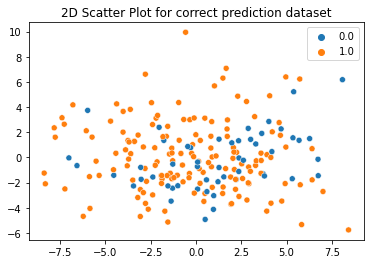

In [18]:
# CORRECT PREDICTIONS DATASET
# plot a 2D Scatter Plot using PCA for correct prediction dataset
df = correct_df.drop(['Actual','Predicted'],axis=1)

model = PCA(n_components=2)
pca_data = model.fit_transform(df)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue=correct_df['Predicted'])
plt.title('2D Scatter Plot for correct prediction dataset')
plt.legend()
plt.show()

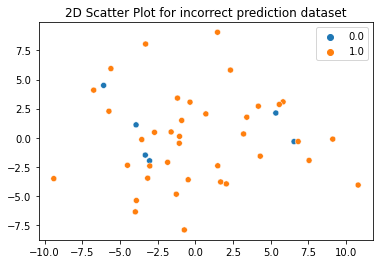

In [19]:
# INCORRECT PREDICTIONS DATASET
# plot a 2D Scatter Plot using PCA for incorrect prediction dataset
df = incorrect_df.drop(['Actual','Predicted'],axis=1)

model = PCA(n_components=2)
pca_data = model.fit_transform(df)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue=incorrect_df['Predicted'])
plt.title('2D Scatter Plot for incorrect prediction dataset')
plt.legend()
plt.show()

Observations: 
<ol>
    1. For correct prediction dataset, the points are completely scattered hence the dataset is not linearly separable. <br>
    2. For incorrect prediction dataset, since there are less number of datapoints so we can linearly separate them to some extent.
</ol>

### 3D Scatter Plot

In [20]:
# CORRECT PREDICTIONS DATASET
# Reference: https://plot.ly/pandas/3d-scatter-plots/
# plot a 3D scatter plot using PCA for correct prediction dataset
df = correct_df.drop(['Actual','Predicted'],axis=1)

model = PCA(n_components=3,random_state=0)
pca_data = model.fit_transform(df)
data = pd.DataFrame(pca_data,columns=['Feature 1','Feature 2','Feature 3'])
data['Predicted'] = correct_df['Predicted']
figure = px.scatter_3d(data,x="Feature 1",y="Feature 2",z="Feature 3",color="Predicted")
figure.show()

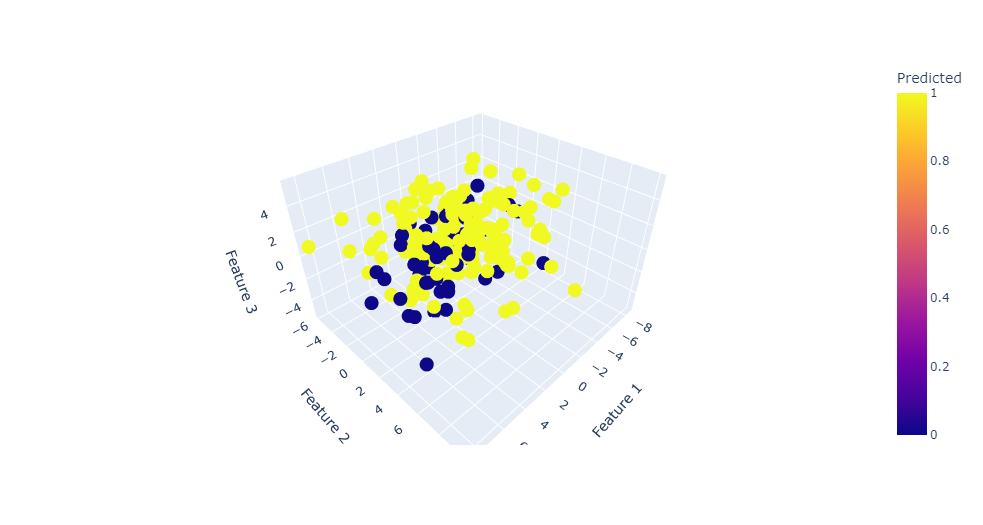

In [21]:
Image('./correctprediction3dscatterplot.png',width=800,height=500)

In [22]:
# INCORRECT PREDICTIONS DATASET
# Reference: https://plot.ly/pandas/3d-scatter-plots/
# plot a 3D scatter plot using PCA for incorrect prediction dataset
df = incorrect_df.drop(['Actual','Predicted'],axis=1)

model = PCA(n_components=3,random_state=0)
pca_data = model.fit_transform(df)
data = pd.DataFrame(pca_data,columns=['Feature 1','Feature 2','Feature 3'])
data['Predicted'] = incorrect_df['Predicted']
figure = px.scatter_3d(data,x="Feature 1",y="Feature 2",z="Feature 3",color="Predicted")
figure.show()

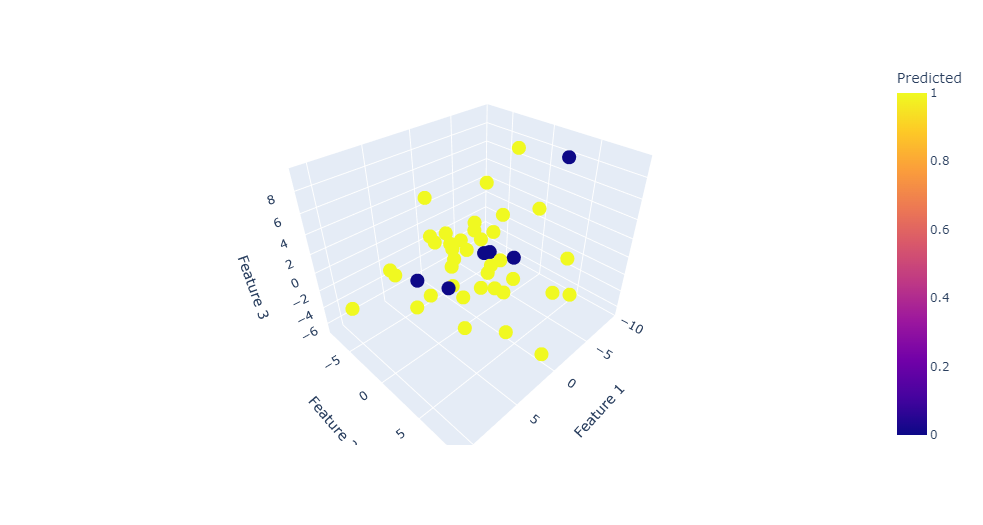

In [23]:
Image('./incorrectprediction3dscatterplot.png',width=800,height=500)

Observations: 
<ol>
    1. For correct prediction dataset, the points are linearly separable to some extent. <br>
    2. For incorrect prediction dataset, the points are linearly separable to some extent.
</ol>

### Probability Density Function and Cumulative Distribution Function

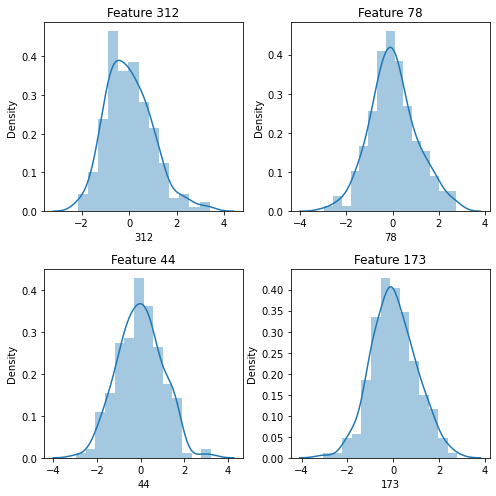

In [28]:
# CORRECT PREDICTIONS DATASET
# Reference: https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots
# plot the pdf of 4 random features for correct predictions dataset
fig, axes = plt.subplots(2,2,figsize=(7,7))
random_features = np.random.randint(0,322,4)

# Random feature 0
sns.distplot(correct_df[random_features[0]],ax=axes[0,0])
axes[0,0].set_title('Feature {}'.format(random_features[0]))
# Random feature 0
sns.distplot(correct_df[random_features[1]],ax=axes[0,1])
axes[0,1].set_title('Feature {}'.format(random_features[1]))
# Random feature 0
sns.distplot(correct_df[random_features[2]],ax=axes[1,0])
axes[1,0].set_title('Feature {}'.format(random_features[2]))
# Random feature 0
sns.distplot(correct_df[random_features[3]],ax=axes[1,1])
axes[1,1].set_title('Feature {}'.format(random_features[3]))

fig.tight_layout()
plt.show()

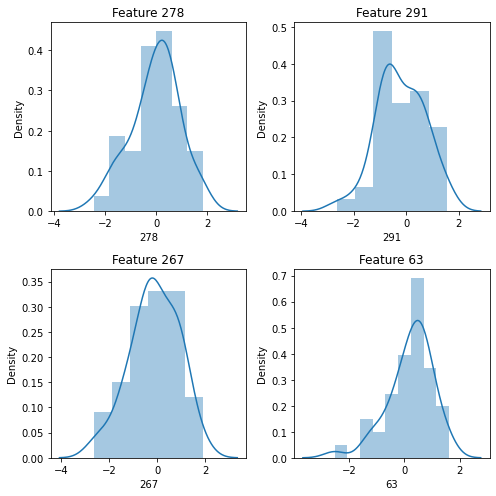

In [30]:
# INCORRECT PREDICTIONS DATASET
# Reference: https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots
# plot the pdf of 4 random features for incorrect predictions dataset
fig, axes = plt.subplots(2,2,figsize=(7,7))
random_features = np.random.randint(0,322,4)

# Random feature 0
sns.distplot(incorrect_df[random_features[0]],ax=axes[0,0])
axes[0,0].set_title('Feature {}'.format(random_features[0]))
# Random feature 1
sns.distplot(incorrect_df[random_features[1]],ax=axes[0,1])
axes[0,1].set_title('Feature {}'.format(random_features[1]))
# Random feature 2
sns.distplot(incorrect_df[random_features[2]],ax=axes[1,0])
axes[1,0].set_title('Feature {}'.format(random_features[2]))
# Random feature 3
sns.distplot(incorrect_df[random_features[3]],ax=axes[1,1])
axes[1,1].set_title('Feature {}'.format(random_features[3]))

fig.tight_layout()
plt.show()

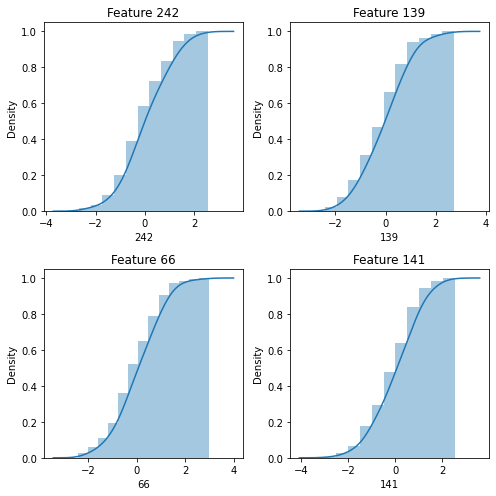

In [31]:
# CORRECT PREDICTIONS DATASET
# Reference: https://stackoverflow.com/questions/39297523/plot-cdf-cumulative-histogram-using-seaborn-python
# plot the cdf of 4 random features for correct predictions dataset
fig, axes = plt.subplots(2,2,figsize=(7,7))
random_features = np.random.randint(0,322,4)

# Random Feature 0
sns.distplot(correct_df[random_features[0]],ax=axes[0,0],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
axes[0,0].set_title('Feature {}'.format(random_features[0]))
# Random Feature 1
sns.distplot(correct_df[random_features[1]],ax=axes[0,1],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
axes[0,1].set_title('Feature {}'.format(random_features[1]))
# Random Feature 2
sns.distplot(correct_df[random_features[2]],ax=axes[1,0],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
axes[1,0].set_title('Feature {}'.format(random_features[2]))
# Random Feature 3
sns.distplot(correct_df[random_features[3]],ax=axes[1,1],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
axes[1,1].set_title('Feature {}'.format(random_features[3]))

fig.tight_layout()
plt.show()

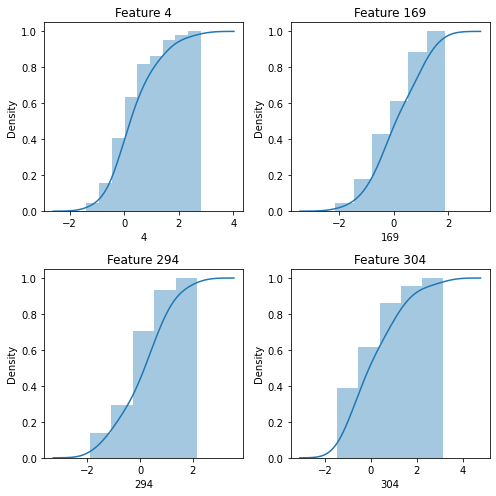

In [39]:
# INCORRECT PREDICTIONS DATASET
# Reference: https://stackoverflow.com/questions/39297523/plot-cdf-cumulative-histogram-using-seaborn-python
# plot the cdf of 4 random features for incorrect predictions dataset
fig, axes = plt.subplots(2,2,figsize=(7,7))
random_features = np.random.randint(0,322,4)

# Random Feature 0
sns.distplot(incorrect_df[random_features[0]],ax=axes[0,0],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
axes[0,0].set_title('Feature {}'.format(random_features[0]))
# Random Feature 1
sns.distplot(incorrect_df[random_features[1]],ax=axes[0,1],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
axes[0,1].set_title('Feature {}'.format(random_features[1]))
# Random Feature 2
sns.distplot(incorrect_df[random_features[2]],ax=axes[1,0],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
axes[1,0].set_title('Feature {}'.format(random_features[2]))
# Random Feature 3
sns.distplot(incorrect_df[random_features[3]],ax=axes[1,1],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
axes[1,1].set_title('Feature {}'.format(random_features[3]))

fig.tight_layout()
plt.show()

Observations: 
<ol>
    1. For correct prediction dataset, the probability density function of 4 randomly chosen features looks like Gaussian Distribution. <br>
    2. For incorrect prediction dataset, the probability density function of 4 randomly chosen features looks somewhat like Gaussian Distribution. <br>
    3. For correct prediction dataset, the cumulative distribution function of 4 randomly chosen features has  same slope. <br>
    4. For incorrect prediction dataset, the cumulative distribution function of 4 randomly chosen features has almost same slope. 
</ol>

### Mean and Standard Deviation

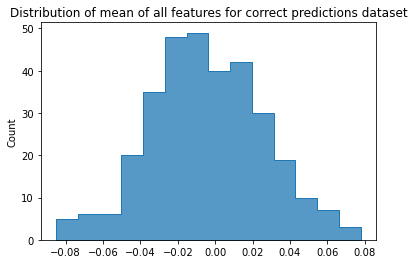

In [40]:
# CORRECT PREDICTIONS DATASET
# Reference: https://www.kaggle.com/artgor/how-to-not-overfit
# compute mean of each feature for correct predictions dataset
correct = correct_df.drop(['Actual','Predicted'], axis=1)
data = correct[correct.columns].mean()
sns.histplot(data,element="step")
plt.title('Distribution of mean of all features for correct predictions dataset')
plt.show()

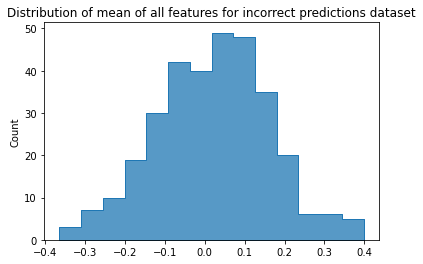

In [41]:
# INCORRECT PREDICTIONS DATASET
# Reference: https://www.kaggle.com/artgor/how-to-not-overfit
# compute mean of each feature for incorrect predictions dataset
incorrect = incorrect_df.drop(['Actual','Predicted'], axis=1)
data = incorrect[incorrect.columns].mean()
sns.histplot(data,element="step")
plt.title('Distribution of mean of all features for incorrect predictions dataset')
plt.show()

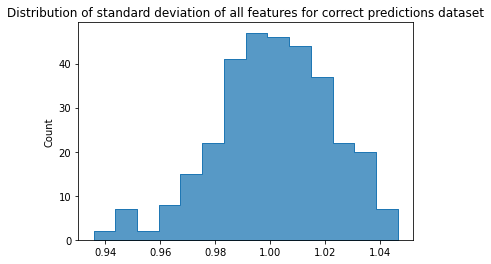

In [42]:
# CORRECT PREDICTIONS DATASET
# Reference: https://www.kaggle.com/artgor/how-to-not-overfit
# compute standard deviation of each feature for correct predictions dataset
correct = correct_df.drop(['Actual','Predicted'], axis=1)
data = correct[correct.columns].std()
sns.histplot(data,element="step")
plt.title('Distribution of standard deviation of all features for correct predictions dataset')
plt.show()

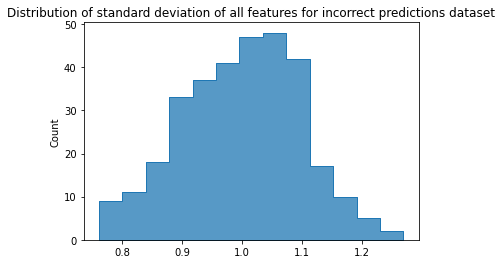

In [43]:
# INCORRECT PREDICTIONS DATASET
# Reference: https://www.kaggle.com/artgor/how-to-not-overfit
# compute standard deviation of each feature for incorrect predictions dataset
incorrect = incorrect_df.drop(['Actual','Predicted'], axis=1)
data = incorrect[incorrect.columns].std()
sns.histplot(data,element="step")
plt.title('Distribution of standard deviation of all features for incorrect predictions dataset')
plt.show()

Observations: 
<ol>
    1. For correct prediction dataset, we observe that columns of the dataset has mean of 0+/-0.08. <br>
    2. For incorrect prediction dataset, we observe that columns of the dataset has mean of 0+/-0.3. <br>
    3. For correct prediction dataset, we observe that columns of the dataset has standard deviation of 1+/-0.04. <br>
    4. For incorrect prediction dataset, we observe that columns of the dataset has standard deviation of 1+/-0.2. 
</ol>

### Box Plots and Whiskers

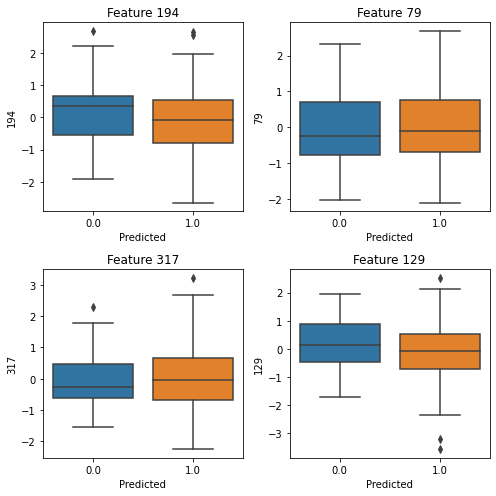

In [37]:
# CORRECT PREDICTIONS DATASET
# plot box plots of 4 random features for correct predictions dataset
fig, axes = plt.subplots(2,2,figsize=(7,7))
random_features = np.random.randint(0,322,4)

# Random feature 0
sns.boxplot(data=correct_df,x='Predicted',y=random_features[0],ax=axes[0,0])
axes[0,0].set_title('Feature {}'.format(random_features[0]))
# Random feature 1
sns.boxplot(data=correct_df,x='Predicted',y=random_features[1],ax=axes[0,1])
axes[0,1].set_title('Feature {}'.format(random_features[1]))
# Random feature 2
sns.boxplot(data=correct_df,x='Predicted',y=random_features[2],ax=axes[1,0])
axes[1,0].set_title('Feature {}'.format(random_features[2]))
# Random feature 3
sns.boxplot(data=correct_df,x='Predicted',y=random_features[3],ax=axes[1,1])
axes[1,1].set_title('Feature {}'.format(random_features[3]))

fig.tight_layout()
plt.show()

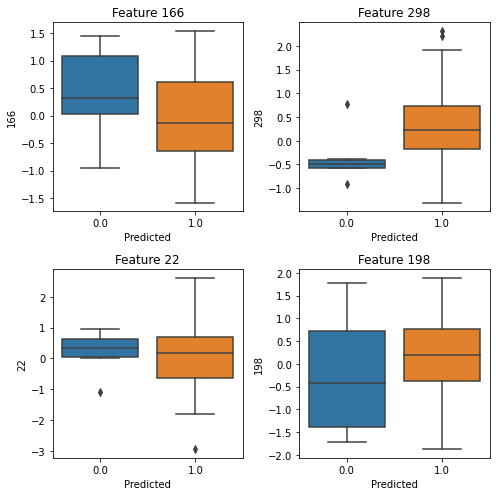

In [38]:
# INCORRECT PREDICTIONS DATASET
# plot box plots of 4 random features for incorrect predictions dataset
fig, axes = plt.subplots(2,2,figsize=(7,7))
random_features = np.random.randint(0,322,4)

# Random feature 0
sns.boxplot(data=incorrect_df,x='Predicted',y=random_features[0],ax=axes[0,0])
axes[0,0].set_title('Feature {}'.format(random_features[0]))
# Random feature 1
sns.boxplot(data=incorrect_df,x='Predicted',y=random_features[1],ax=axes[0,1])
axes[0,1].set_title('Feature {}'.format(random_features[1]))
# Random feature 2
sns.boxplot(data=incorrect_df,x='Predicted',y=random_features[2],ax=axes[1,0])
axes[1,0].set_title('Feature {}'.format(random_features[2]))
# Random feature 3
sns.boxplot(data=incorrect_df,x='Predicted',y=random_features[3],ax=axes[1,1])
axes[1,1].set_title('Feature {}'.format(random_features[3]))

fig.tight_layout()
plt.show()

Observations: 
<ol>
    1. For correct prediction dataset, the 4 randomly chosen features have almost same median for both classes and there might be very few outliers in the dataset. <br>
    2. For incorrect prediction dataset, the 4 randomly chosen features have different median for both classes and there are outliers in the dataset.
</ol>

### Violin Plots

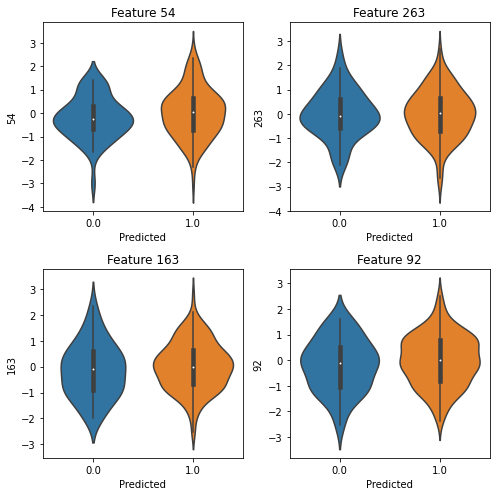

In [39]:
# INCORRECT PREDICTIONS DATASET
# plot violin plots of 4 random features for correct predictions dataset
fig, axes = plt.subplots(2,2,figsize=(7,7))
random_features = np.random.randint(0,322,4)

# Random feature 0
sns.violinplot(data=correct_df,x='Predicted',y=random_features[0],ax=axes[0,0])
axes[0,0].set_title('Feature {}'.format(random_features[0]))
# Random feature 1
sns.violinplot(data=correct_df,x='Predicted',y=random_features[1],ax=axes[0,1])
axes[0,1].set_title('Feature {}'.format(random_features[1]))
# Random feature 2
sns.violinplot(data=correct_df,x='Predicted',y=random_features[2],ax=axes[1,0])
axes[1,0].set_title('Feature {}'.format(random_features[2]))
# Random feature 3
sns.violinplot(data=correct_df,x='Predicted',y=random_features[3],ax=axes[1,1])
axes[1,1].set_title('Feature {}'.format(random_features[3]))

fig.tight_layout()
plt.show()

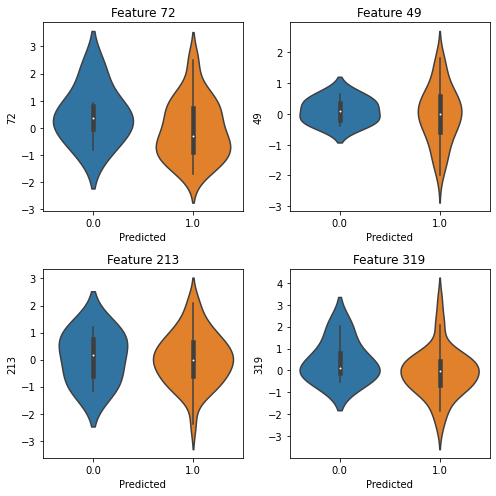

In [40]:
# INCORRECT PREDICTIONS DATASET
# plot violin plots of 4 random features for incorrect predictions dataset
fig, axes = plt.subplots(2,2,figsize=(7,7))
random_features = np.random.randint(0,322,4)

# Random feature 0
sns.violinplot(data=incorrect_df,x='Predicted',y=random_features[0],ax=axes[0,0])
axes[0,0].set_title('Feature {}'.format(random_features[0]))
# Random feature 1
sns.violinplot(data=incorrect_df,x='Predicted',y=random_features[1],ax=axes[0,1])
axes[0,1].set_title('Feature {}'.format(random_features[1]))
# Random feature 2
sns.violinplot(data=incorrect_df,x='Predicted',y=random_features[2],ax=axes[1,0])
axes[1,0].set_title('Feature {}'.format(random_features[2]))
# Random feature 3
sns.violinplot(data=incorrect_df,x='Predicted',y=random_features[3],ax=axes[1,1])
axes[1,1].set_title('Feature {}'.format(random_features[3]))

fig.tight_layout()
plt.show()

Observations: The violin plots combines the benefits of histograms, pdf, cdf and boxplots.

### Contour Plots

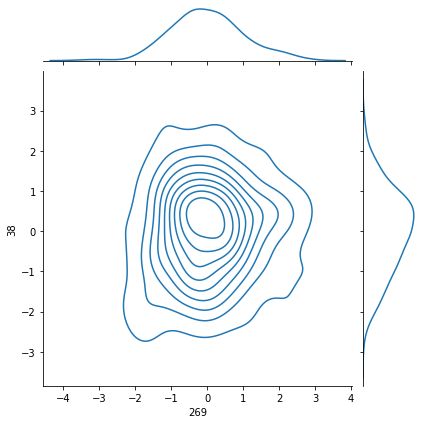

In [41]:
# CORRECT PREDICTIONS DATASET
# plot a contour plot between 2 random features for correct predictions dataset
random_features = np.random.randint(0,322,2)

sns.jointplot(x=random_features[0],y=random_features[1],data=correct_df,kind="kde")
plt.show()

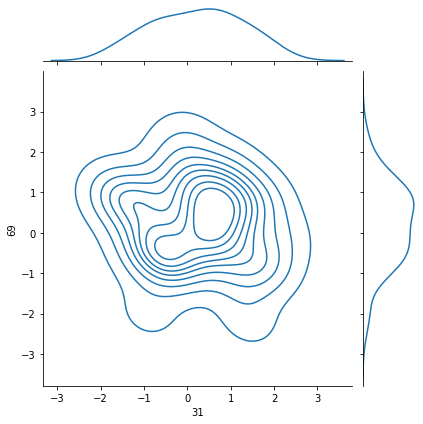

In [42]:
# INCORRECT PREDICTIONS DATASET
# plot a contour plot between 2 random features for incorrect predictions dataset
random_features = np.random.randint(0,322,2)

sns.jointplot(x=random_features[0],y=random_features[1],data=incorrect_df,kind="kde")
plt.show()

Observations: 
<ol>
    1. For correct prediction dataset, we can observe that the most density of datapoints lies in the range -1 and +1. <br>
    2. For incorrect prediction dataset, we can observe that the most density of datapoints lies in the range -1 and +1.
</ol>

### QQ Plot and PDF Of Randomly Selected Features

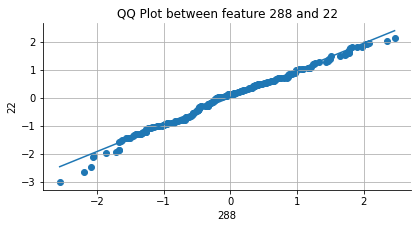

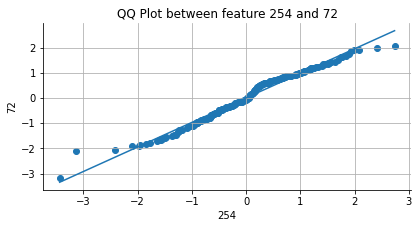

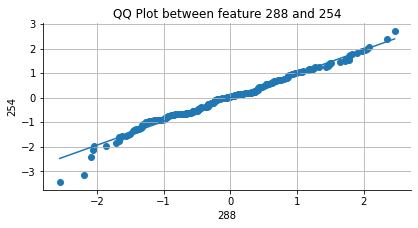

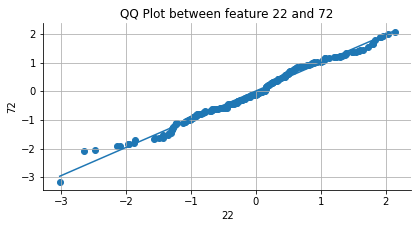

In [44]:
# CORRECT PREDICTIONS DATASET
# Reference: https://seaborn-qqplot.readthedocs.io/en/latest/
# Reference: https://stackoverflow.com/questions/45148704/how-to-hide-axes-and-gridlines-in-matplotlib-python
# plot qq plot of 4 randomly selected features for correct predictions dataset
random_features = np.random.randint(0,322,4)

# Random feature 0
pplot(correct_df, x=random_features[0], y=random_features[1], kind='qq',height=3,aspect=2,display_kws={"identity":False, "fit":True})
plt.title('QQ Plot between feature {} and {}'.format(random_features[0],random_features[1]))
plt.grid(b=None)
# Random feature 1
pplot(correct_df, x=random_features[2], y=random_features[3], kind='qq',height=3,aspect=2,display_kws={"identity":False, "fit":True})
plt.title('QQ Plot between feature {} and {}'.format(random_features[2],random_features[3]))
plt.grid(b=None)
# Random feature 2
pplot(correct_df, x=random_features[0], y=random_features[2], kind='qq',height=3,aspect=2,display_kws={"identity":False, "fit":True})
plt.title('QQ Plot between feature {} and {}'.format(random_features[0],random_features[2]))
plt.grid(b=None)
# Random feature 3
pplot(correct_df, x=random_features[1], y=random_features[3], kind='qq',height=3,aspect=2,display_kws={"identity":False, "fit":True})
plt.title('QQ Plot between feature {} and {}'.format(random_features[1],random_features[3]))
plt.grid(b=None)
plt.show()

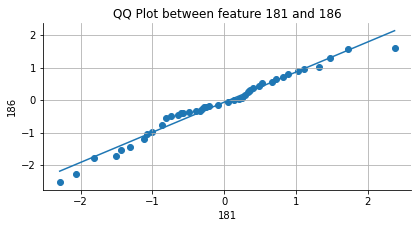

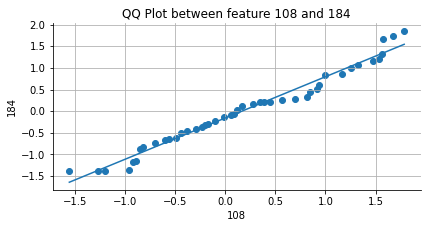

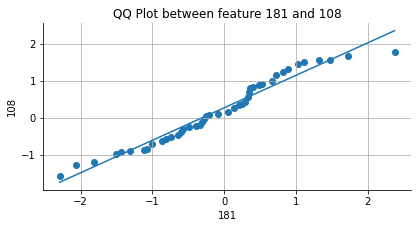

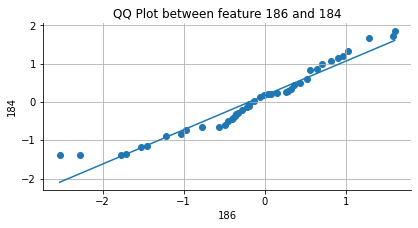

In [46]:
# INCORRECT PREDICTIONS DATASET
# Reference: https://seaborn-qqplot.readthedocs.io/en/latest/
# Reference: https://stackoverflow.com/questions/45148704/how-to-hide-axes-and-gridlines-in-matplotlib-python
# plot qq plot of 4 randomly selected features for incorrect predictions dataset
random_features = np.random.randint(0,322,4)

# Random feature 0
pplot(incorrect_df, x=random_features[0], y=random_features[1], kind='qq',height=3,aspect=2,display_kws={"identity":False, "fit":True})
plt.title('QQ Plot between feature {} and {}'.format(random_features[0],random_features[1]))
plt.grid(b=None)
# Random feature 1
pplot(incorrect_df, x=random_features[2], y=random_features[3], kind='qq',height=3,aspect=2,display_kws={"identity":False, "fit":True})
plt.title('QQ Plot between feature {} and {}'.format(random_features[2],random_features[3]))
plt.grid(b=None)
# Random feature 2
pplot(incorrect_df, x=random_features[0], y=random_features[2], kind='qq',height=3,aspect=2,display_kws={"identity":False, "fit":True})
plt.title('QQ Plot between feature {} and {}'.format(random_features[0],random_features[2]))
plt.grid(b=None)
# Random feature 3
pplot(incorrect_df, x=random_features[1], y=random_features[3], kind='qq',height=3,aspect=2,display_kws={"identity":False, "fit":True})
plt.title('QQ Plot between feature {} and {}'.format(random_features[1],random_features[3]))
plt.grid(b=None)
plt.show()

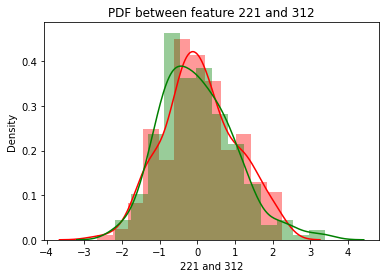

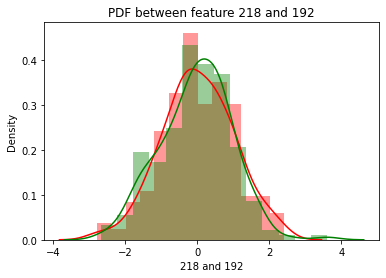

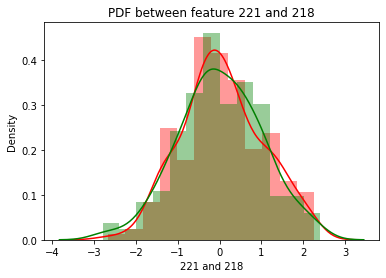

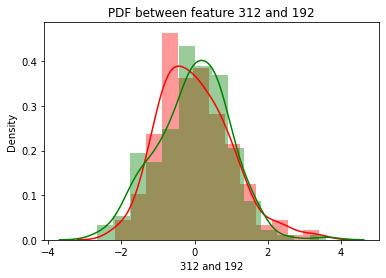

In [47]:
# CORRECT PREDICTIONS DATASET
# Reference: https://seaborn.pydata.org/generated/seaborn.displot.html
# plot pdf of 4 random features for correct predictions dataset
random_features = np.random.randint(0,322,4)

# Random feature 0
sns.distplot(correct_df[random_features[0]],color='red')
sns.distplot(correct_df[random_features[1]],color='green')
plt.xlabel("{} and {}".format(random_features[0],random_features[1]))
plt.title('PDF between feature {} and {}'.format(random_features[0],random_features[1]))
plt.show()
# Random feature 1
sns.distplot(correct_df[random_features[2]],color='red')
sns.distplot(correct_df[random_features[3]],color='green')
plt.xlabel("{} and {}".format(random_features[2],random_features[3]))
plt.title('PDF between feature {} and {}'.format(random_features[2],random_features[3]))
plt.show()
# Random feature 2
sns.distplot(correct_df[random_features[0]],color='red')
sns.distplot(correct_df[random_features[2]],color='green')
plt.xlabel("{} and {}".format(random_features[0],random_features[2]))
plt.title('PDF between feature {} and {}'.format(random_features[0],random_features[2]))
plt.show()
# Random feature 3
sns.distplot(correct_df[random_features[1]],color='red')
sns.distplot(correct_df[random_features[3]],color='green')
plt.xlabel("{} and {}".format(random_features[1],random_features[3]))
plt.title('PDF between feature {} and {}'.format(random_features[1],random_features[3]))
plt.show()

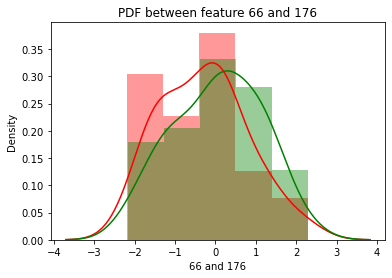

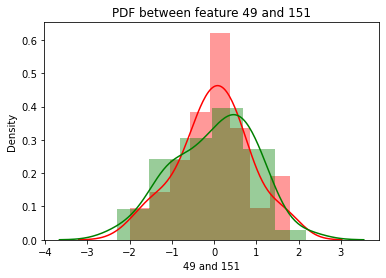

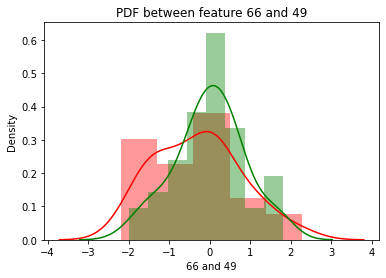

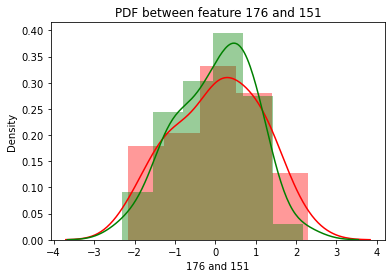

In [48]:
# INCORRECT PREDICTIONS DATASET
# Reference: https://seaborn.pydata.org/generated/seaborn.displot.html
# plot pdf of 4 random features for incorrect predictions dataset
random_features = np.random.randint(0,322,4)

# Random feature 0
sns.distplot(incorrect_df[random_features[0]],color='red')
sns.distplot(incorrect_df[random_features[1]],color='green')
plt.xlabel("{} and {}".format(random_features[0],random_features[1]))
plt.title('PDF between feature {} and {}'.format(random_features[0],random_features[1]))
plt.show()
# Random feature 1
sns.distplot(incorrect_df[random_features[2]],color='red')
sns.distplot(incorrect_df[random_features[3]],color='green')
plt.xlabel("{} and {}".format(random_features[2],random_features[3]))
plt.title('PDF between feature {} and {}'.format(random_features[2],random_features[3]))
plt.show()
# Random feature 2
sns.distplot(incorrect_df[random_features[0]],color='red')
sns.distplot(incorrect_df[random_features[2]],color='green')
plt.xlabel("{} and {}".format(random_features[0],random_features[2]))
plt.title('PDF between feature {} and {}'.format(random_features[0],random_features[2]))
plt.show()
# Random feature 3
sns.distplot(incorrect_df[random_features[1]],color='red')
sns.distplot(incorrect_df[random_features[3]],color='green')
plt.xlabel("{} and {}".format(random_features[1],random_features[3]))
plt.title('PDF between feature {} and {}'.format(random_features[1],random_features[3]))
plt.show()

Observations: 
<ol>
    1. For correct prediction dataset, we observed that we are getting a straight line in QQ plot for 4 randomly selected features.<br>
    2. For incorrect prediction dataset, we observed that  we are getting somehwhat a straight line in QQ plot for 4 randomly selected features.<br>
    3. For correct prediction dataset, we observe that for 4 randomly selected features the PDFs are overlapping. <br>
    4. For incorrect prediction dataset, we observe that for 4 randomly selected features the PDFs are somewhat overlapping.
</ol>

Observations: 
<ol>
    1. We have taken the preprocessed dataset for post training analysis.<br>
    2. We are standardizing preprocessed dataset features by removing the mean and scaling to unit variance.<br>
    3. We are using the best model to make predictions and we are getting a good AUC ROC Score of 0.92 on the final dataset.<br>
    4. We are creating two datasets correct_df and incorrect_df such that the first dataframe contains the correct predictions and second dataframe contains the incorrect predictions.<br>
    5. The correct prediction dataset follows perfect gaussian distribution, all features have almost same median, and all the features have the same distribution as we are getting a straight line on QQ plot. <br>
    6. The incorrect prediction dataset does not follow perfect gaussian distribution, features have different median, the features have the different distribution as we are not getting a straight line on QQ plot, and outliers are present in the dataset.
</ol>